In [7]:
import pandas as pd

# Try reading the CSV file with 'ISO-8859-1' encoding
dfn = pd.read_csv('final_merged_data.csv', encoding='ISO-8859-1')
dfn.head()

,date_converted,Unnamed: 0_x,Year,FlightDate,DOT_ID_Reporting_Airline,Tail_Number,Flight_Number_Reporting_Airline,OriginAirportID,OriginCityName,OriginWac,...,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun,Unnamed: 0_y
0,2022-01-01,362956,2022,1/1/2022,20304,N616UX,4743,11292,"Denver, CO",82,...,18.9,28.3,0.0,NaN,43.0,6.5,NaN,1011.6,NaN,NaN
1,2022-01-01,362956,2022,1/1/2022,20304,N616UX,4743,11292,"Denver, CO",82,...,21.1,27.8,0.0,0.0,130.0,12.2,NaN,1018.6,NaN,NaN
2,2022-01-01,362956,2022,1/1/2022,20304,N616UX,4743,11292,"Denver, CO",82,...,6.4,11.6,24.0,0.0,150.0,7.8,NaN,1008.1,NaN,NaN
3,2022-01-01,362956,2022,1/1/2022,20304,N616UX,4743,11292,"Denver, CO",82,...,-9.0,-2.0,1.9,80.0,3.0,18.3,NaN,1014.7,NaN,NaN
4,2022-01-01,362956,2022,1/1/2022,20304,N616UX,4743,11292,"Denver, CO",82,...,-22.2,-4.4,3.0,NaN,25.0,8.5,NaN,1017.2,NaN,NaN


In [8]:
list(dfn.columns)

['date_converted',
 'Unnamed: 0_x',
 'Year',
 'FlightDate',
 'DOT_ID_Reporting_Airline',
 'Tail_Number',
 'Flight_Number_Reporting_Airline',
 'OriginAirportID',
 'OriginCityName',
 'OriginWac',
 'DestAirportID',
 'DestCityName',
 'DestWac',
 'CRSDepTime',
 'DepTime',
 'DepDelayMinutes',
 'DepartureDelayGroups',
 'TaxiOut',
 'WheelsOff',
 'WheelsOn',
 'TaxiIn',
 'CRSArrTime',
 'ArrTime',
 'ArrDelayMinutes',
 'Diverted',
 'CRSElapsedTime',
 'ActualElapsedTime',
 'AirTime',
 'Flights',
 'Distance',
 'CarrierDelay',
 'WeatherDelay',
 'NASDelay',
 'SecurityDelay',
 'LateAircraftDelay',
 'DivAirportLandings',
 'CancellationCode_encoded',
 'index',
 'tavg',
 'tmin',
 'tmax',
 'prcp',
 'snow',
 'wdir',
 'wspd',
 'wpgt',
 'pres',
 'tsun',
 'Unnamed: 0_y']

In [9]:
dfn[['CarrierDelay',
 'WeatherDelay',
 'NASDelay',
 'SecurityDelay',
 'LateAircraftDelay',]] = dfn[['CarrierDelay',
 'WeatherDelay',
 'NASDelay',
 'SecurityDelay',
 'LateAircraftDelay']].fillna(0)
# Display the first few rows of the DataFrame
dfn.head()

,date_converted,Unnamed: 0_x,Year,FlightDate,DOT_ID_Reporting_Airline,Tail_Number,Flight_Number_Reporting_Airline,OriginAirportID,OriginCityName,OriginWac,...,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun,Unnamed: 0_y
0,2022-01-01,362956,2022,1/1/2022,20304,N616UX,4743,11292,"Denver, CO",82,...,18.9,28.3,0.0,NaN,43.0,6.5,NaN,1011.6,NaN,NaN
1,2022-01-01,362956,2022,1/1/2022,20304,N616UX,4743,11292,"Denver, CO",82,...,21.1,27.8,0.0,0.0,130.0,12.2,NaN,1018.6,NaN,NaN
2,2022-01-01,362956,2022,1/1/2022,20304,N616UX,4743,11292,"Denver, CO",82,...,6.4,11.6,24.0,0.0,150.0,7.8,NaN,1008.1,NaN,NaN
3,2022-01-01,362956,2022,1/1/2022,20304,N616UX,4743,11292,"Denver, CO",82,...,-9.0,-2.0,1.9,80.0,3.0,18.3,NaN,1014.7,NaN,NaN
4,2022-01-01,362956,2022,1/1/2022,20304,N616UX,4743,11292,"Denver, CO",82,...,-22.2,-4.4,3.0,NaN,25.0,8.5,NaN,1017.2,NaN,NaN


In [10]:
def fill_na_with_mean(group):
    # For each column in the group, replace NaN with the mean of that column
    return group.fillna(group.mean())

# Group by 'date' and 'city', then apply the function to fill NaN values
dfn[['tavg',
 'tmin',
 'tmax',
 'prcp',
 'snow',
 'wdir',
 'wspd',
 'wpgt',
 'pres',
 'tsun']] = dfn.groupby(['FlightDate', 'OriginCityName'])[['tavg',
 'tmin',
 'tmax',
 'prcp',
 'snow',
 'wdir',
 'wspd',
 'wpgt',
 'pres',
 'tsun',]].transform(fill_na_with_mean)

# Display modified DataFrame
print("\nDataFrame after replacing NaN values with the mean:")
print(dfn)


DataFrame after replacing NaN values with the mean:
       date_converted  Unnamed: 0_x  Year FlightDate  \
0          2022-01-01        362956  2022   1/1/2022   
1          2022-01-01        362956  2022   1/1/2022   
2          2022-01-01        362956  2022   1/1/2022   
3          2022-01-01        362956  2022   1/1/2022   
4          2022-01-01        362956  2022   1/1/2022   
...               ...           ...   ...        ...   
546943     2024-08-31        123143  2024  8/31/2024   
546944     2024-08-31        123143  2024  8/31/2024   
546945     2024-08-31        123143  2024  8/31/2024   
546946     2024-08-31        123143  2024  8/31/2024   
546947     2024-08-31        123143  2024  8/31/2024   

        DOT_ID_Reporting_Airline Tail_Number  Flight_Number_Reporting_Airline  \
0                          20304      N616UX                             4743   
1                          20304      N616UX                             4743   
2                          2030

In [11]:
#dfn.drop(columns=['Unnamed: 0_y'], inplace=True)
dfn.drop(columns=['wpgt'], inplace=True)
dfn.drop(columns=['tsun'], inplace=True)
# Display the first few rows of the DataFrame after dropping the column
dfn.head()


,date_converted,Unnamed: 0_x,Year,FlightDate,DOT_ID_Reporting_Airline,Tail_Number,Flight_Number_Reporting_Airline,OriginAirportID,OriginCityName,OriginWac,...,index,tavg,tmin,tmax,prcp,snow,wdir,wspd,pres,Unnamed: 0_y
0,2022-01-01,362956,2022,1/1/2022,20304,N616UX,4743,11292,"Denver, CO",82,...,2022-01-01,22.7,18.9,28.3,0.0,24.106145,43.0,6.5,1011.6,NaN
1,2022-01-01,362956,2022,1/1/2022,20304,N616UX,4743,11292,"Denver, CO",82,...,2022-01-01,24.2,21.1,27.8,0.0,0.000000,130.0,12.2,1018.6,NaN
2,2022-01-01,362956,2022,1/1/2022,20304,N616UX,4743,11292,"Denver, CO",82,...,2022-01-01,9.7,6.4,11.6,24.0,0.000000,150.0,7.8,1008.1,NaN
3,2022-01-01,362956,2022,1/1/2022,20304,N616UX,4743,11292,"Denver, CO",82,...,2022-01-01,-7.3,-9.0,-2.0,1.9,80.000000,3.0,18.3,1014.7,NaN
4,2022-01-01,362956,2022,1/1/2022,20304,N616UX,4743,11292,"Denver, CO",82,...,2022-01-01,-9.7,-22.2,-4.4,3.0,24.106145,25.0,8.5,1017.2,NaN


In [15]:
dfn.drop(columns=['Unnamed: 0_x'], inplace=True)

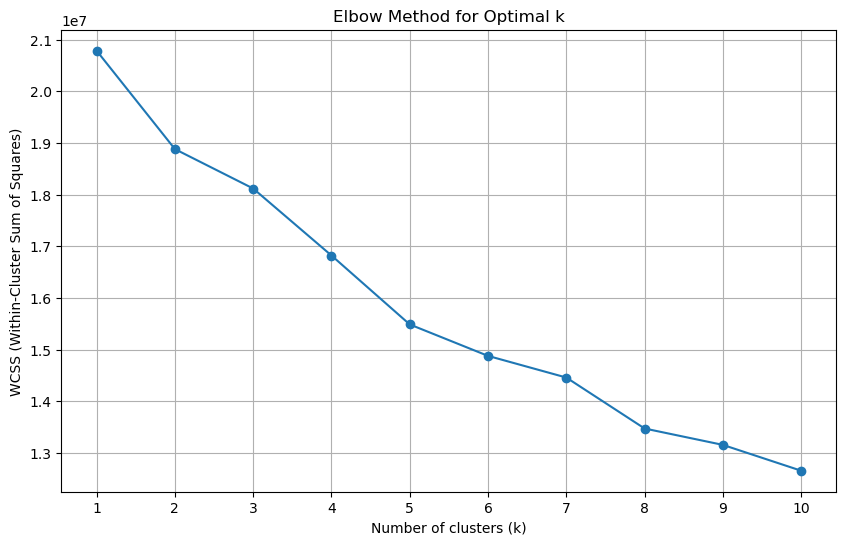

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Assuming you have already loaded your DataFrame and replaced NaN values with 0
dfn.fillna(0, inplace=True)

# Step 1: Select numerical columns for clustering
numerical_cols = dfn.select_dtypes(include=['float64', 'int64']).columns

# Step 2: Standardize the data (optional but recommended)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(dfn[numerical_cols])

# Step 3: Calculate WCSS for a range of cluster numbers
wcss = []
k_values = range(1, 11)  # You can adjust this range

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

# Step 4: Plot the elbow plot
plt.figure(figsize=(10, 6))
plt.plot(k_values, wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.xticks(k_values)
plt.grid()
plt.show()


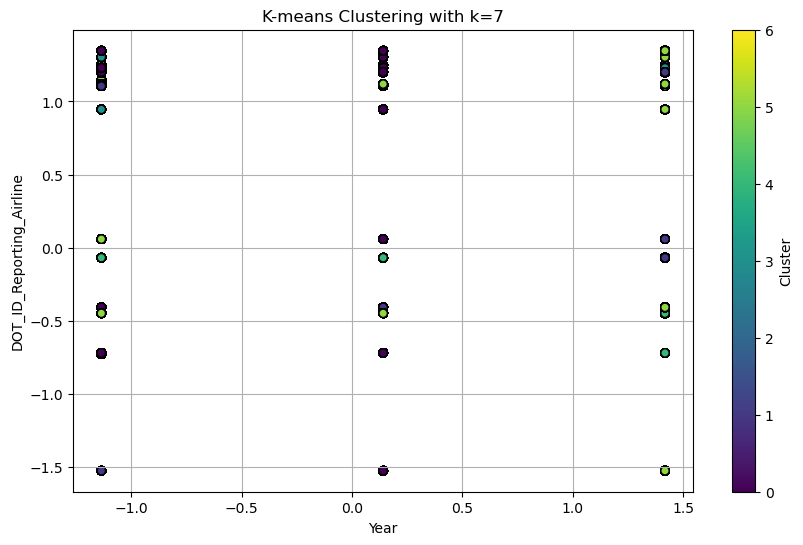

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Assuming you have already loaded your DataFrame and replaced NaN values with 0
dfn.fillna(0, inplace=True)

# Step 1: Select numerical columns for clustering
numerical_cols = dfn.select_dtypes(include=['float64', 'int64']).columns

# Step 2: Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(dfn[numerical_cols])

# Step 3: Perform K-means clustering with k=4
k = 7
kmeans = KMeans(n_clusters=k, random_state=42)
dfn['Cluster'] = kmeans.fit_predict(scaled_data)

# Step 4: Visualize the clusters (using first two numerical columns for 2D representation)
plt.figure(figsize=(10, 6))
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=dfn['Cluster'], cmap='viridis', marker='o', edgecolor='k')
plt.title('K-means Clustering with k=7')
plt.xlabel(numerical_cols[0])
plt.ylabel(numerical_cols[1])
plt.colorbar(label='Cluster')
plt.grid()
plt.show()


In [23]:
cluster_dfs = {}
for i in range(7):  # Assuming clusters are labeled from 0 to 8
    cluster_dfs[i] = dfn[dfn['Cluster'] == i]

# Optionally, display the size of each cluster DataFrame
for i in range(7):
    print(f"Cluster {i} size: {cluster_dfs[i].shape[0]}")

Cluster 0 size: 103949
Cluster 1 size: 175652
Cluster 2 size: 11247
Cluster 3 size: 26634
Cluster 4 size: 58330
Cluster 5 size: 151531
Cluster 6 size: 19605


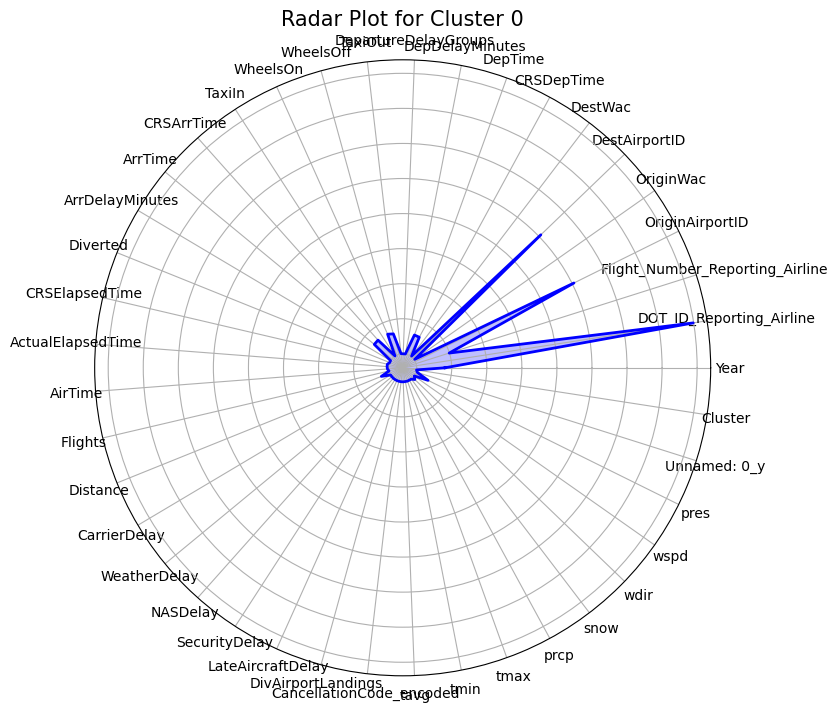

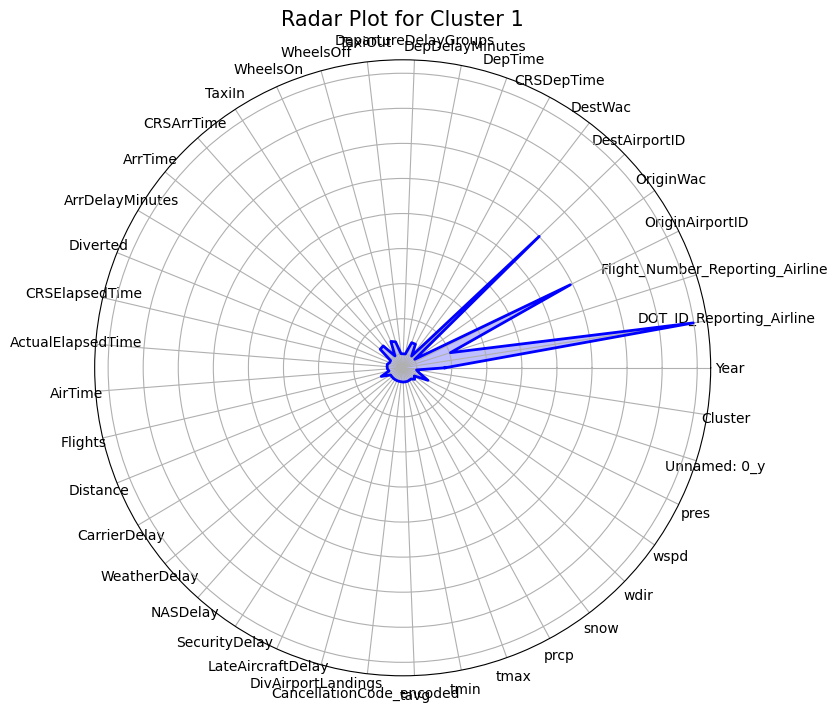

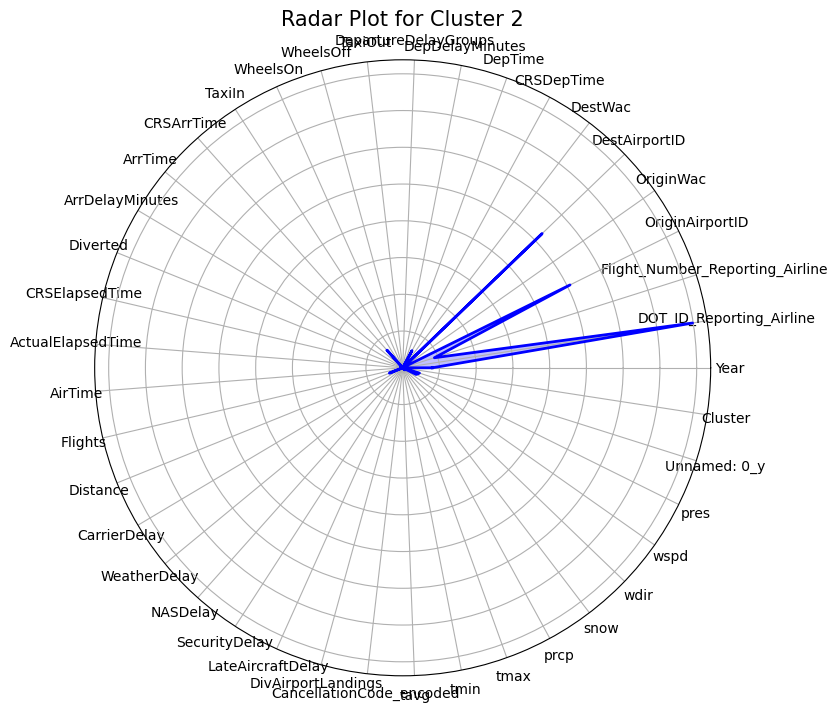

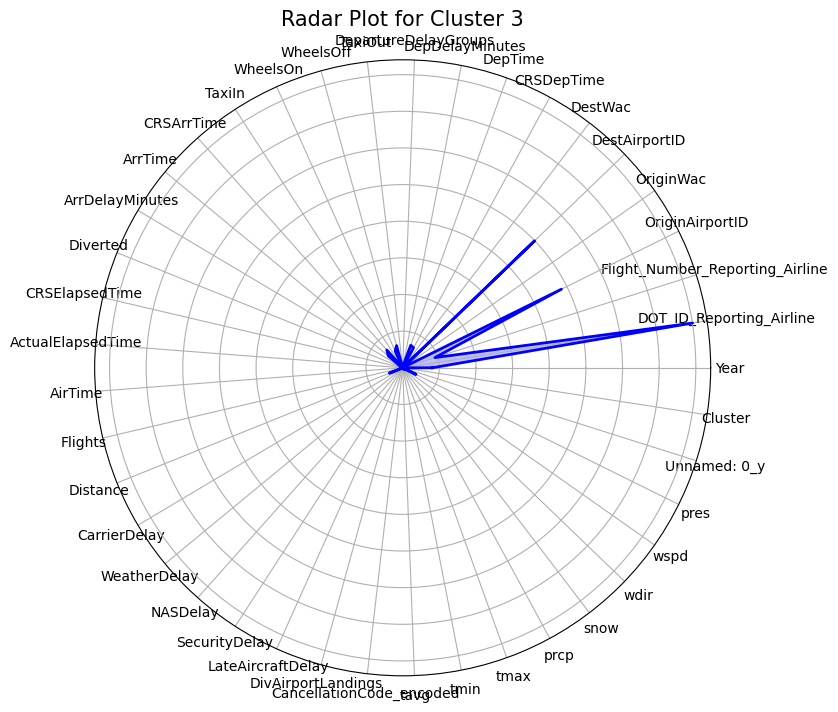

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Create a dictionary to hold the centroids for each cluster
centroids = {}

# Step 2: Calculate centroids for each cluster
for i in range(7):
    # Select only numeric columns for mean calculation
    numeric_cols = cluster_dfs[i].select_dtypes(include=[np.number])
    centroids[i] = numeric_cols.mean()

# Step 3: Create radar plots for each cluster based on centroids
def create_radar_plot(data, cluster_num):
    categories = data.index
    values = data.values
    num_vars = len(categories)

    # Create a list of angles for each category
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

    # Complete the loop for the plot
    values = np.concatenate((values, [values[0]]))  # Close the loop for radar chart
    angles += angles[:1]  # Close the loop for angles

    # Create the radar plot
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
    ax.fill(angles, values, color='blue', alpha=0.25)
    ax.plot(angles, values, color='blue', linewidth=2)

    # Labels for each axis
    ax.set_yticklabels([])  # No labels on the y-axis
    ax.set_xticks(angles[:-1])  # Set the x ticks
    ax.set_xticklabels(categories)  # Set the category labels

    plt.title(f'Radar Plot for Cluster {cluster_num}', size=15)
    plt.show()

# Step 4: Plot radar charts for all clusters using centroids
for i in range(4):
    create_radar_plot(centroids[i], i)


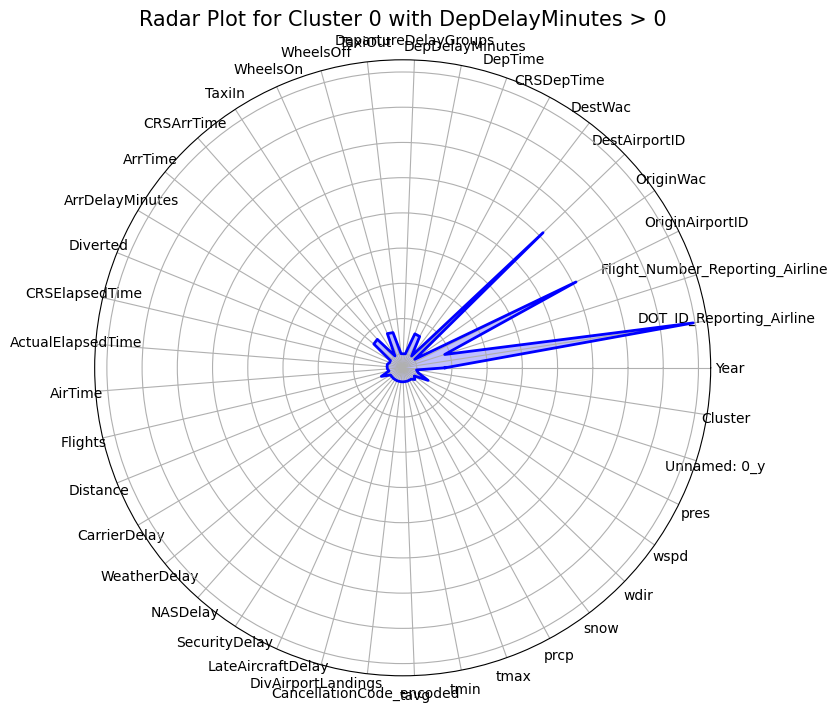

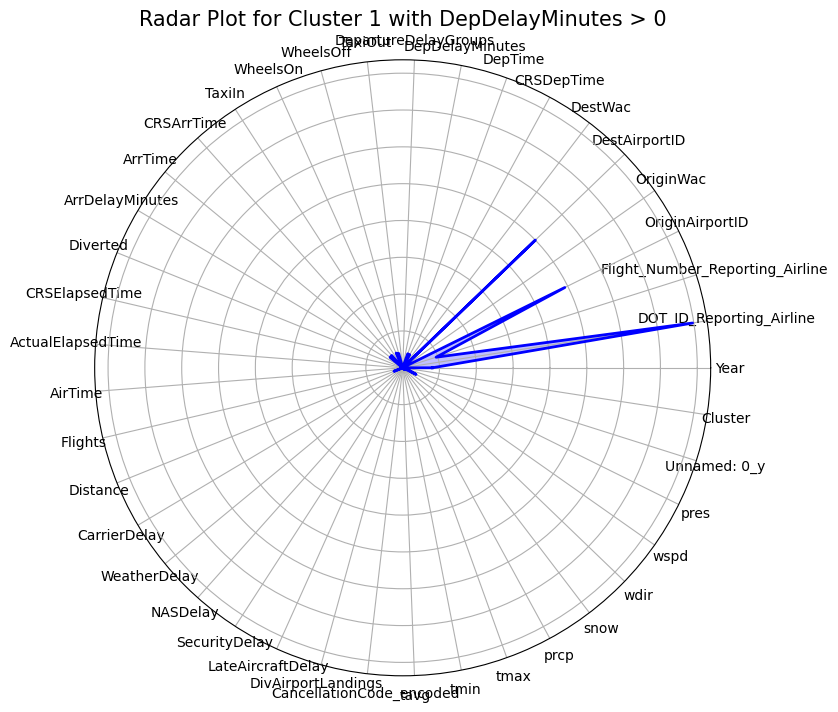

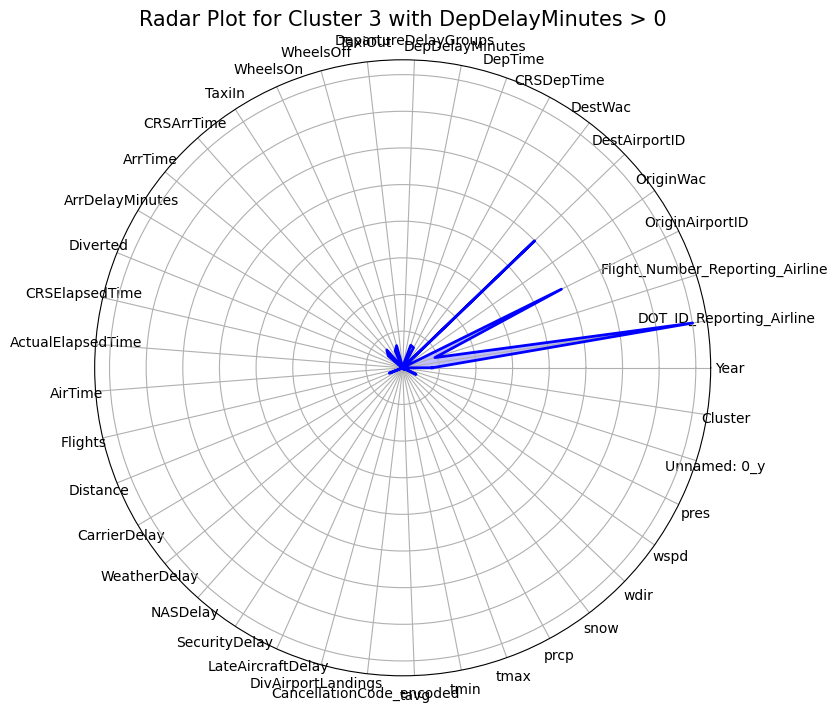

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Create a dictionary to hold the centroids for each cluster
centroids = {}

# Step 2: Calculate centroids for each cluster with DepDelayMinutes > 0
for i in range(7):
    # Filter the cluster DataFrame for rows where 'DepDelayMinutes' > 0
    cluster_with_delay = cluster_dfs[i][cluster_dfs[i]['DepDelayMinutes'] > 0]

    # Select only numeric columns for mean calculation
    numeric_cols = cluster_with_delay.select_dtypes(include=[np.number])

    if not numeric_cols.empty:  # Ensure there are numeric columns to calculate means
        centroids[i] = numeric_cols.mean()

# Step 3: Create radar plots for each cluster based on centroids
def create_radar_plot(data, cluster_num):
    categories = data.index
    values = data.values
    num_vars = len(categories)

    # Create a list of angles for each category
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

    # Complete the loop for the plot
    values = np.concatenate((values, [values[0]]))  # Close the loop for radar chart
    angles += angles[:1]  # Close the loop for angles

    # Create the radar plot
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
    ax.fill(angles, values, color='blue', alpha=0.25)
    ax.plot(angles, values, color='blue', linewidth=2)

    # Labels for each axis
    ax.set_yticklabels([])  # No labels on the y-axis
    ax.set_xticks(angles[:-1])  # Set the x ticks
    ax.set_xticklabels(categories)  # Set the category labels

    plt.title(f'Radar Plot for Cluster {cluster_num} with DepDelayMinutes > 0', size=15)
    plt.show()

# Step 4: Plot radar charts for all clusters using centroids
for i in range(4):
    # Only plot if centroids exist for the cluster
    if i in centroids:
        create_radar_plot(centroids[i], i)
